<a href="https://colab.research.google.com/github/deekshith-291/demo/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files

uploaded = files.upload()

Saving cars.csv to cars (1).csv


In [16]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting a default seaborn style
sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Input data files are available in the read-only '../input/' directory
# For example, running this will list all files under the input path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [9]:
df=pd.read_csv('cars.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df.shape

(234, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
df.isnull().mean()

,0
manufacturer,0.0
model,0.0
displ,0.0
year,0.0
cyl,0.0
trans,0.0
drv,0.0
cty,0.0
hwy,0.0
fl,0.0


In [10]:
df.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


In [ ]:
df.describe(include='object')

,manufacturer,model,trans,drv,fl,class
count,234,234,234,234,234,234
unique,15,38,10,3,5,7
top,dodge,caravan 2wd,auto(l4),f,r,suv
freq,37,11,83,106,168,62


In [ ]:
print(df['model'].unique())
print(df['manufacturer'].unique())
print(df['cty'].unique())
print(df['class'].unique())


['a4' 'a4 quattro' 'a6 quattro' 'c1500 suburban 2wd' 'corvette'
 'k1500 tahoe 4wd' 'malibu' 'caravan 2wd' 'dakota pickup 4wd'
 'durango 4wd' 'ram 1500 pickup 4wd' 'expedition 2wd' 'explorer 4wd'
 'f150 pickup 4wd' 'mustang' 'civic' 'sonata' 'tiburon'
 'grand cherokee 4wd' 'range rover' 'navigator 2wd' 'mountaineer 4wd'
 'altima' 'maxima' 'pathfinder 4wd' 'grand prix' 'forester awd'
 'impreza awd' '4runner 4wd' 'camry' 'camry solara' 'corolla'
 'land cruiser wagon 4wd' 'toyota tacoma 4wd' 'gti' 'jetta' 'new beetle'
 'passat']
['audi' 'chevrolet' 'dodge' 'ford' 'honda' 'hyundai' 'jeep' 'land rover'
 'lincoln' 'mercury' 'nissan' 'pontiac' 'subaru' 'toyota' 'volkswagen']
[18 21 20 16 19 15 17 14 11 13 12 22  9 28 24 25 23 26 33 35 29]
['compact' 'midsize' 'suv' '2seater' 'minivan' 'pickup' 'subcompact']


In [ ]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

/tmp/ipython-input-1450170829.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.year)


<Axes: xlabel='year', ylabel='Density'>

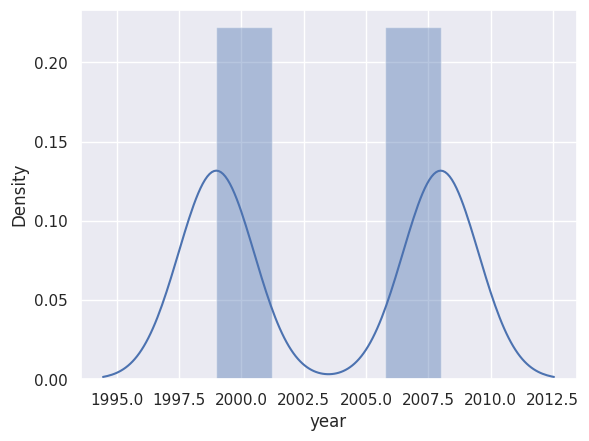

In [ ]:
sns.distplot(df.year)

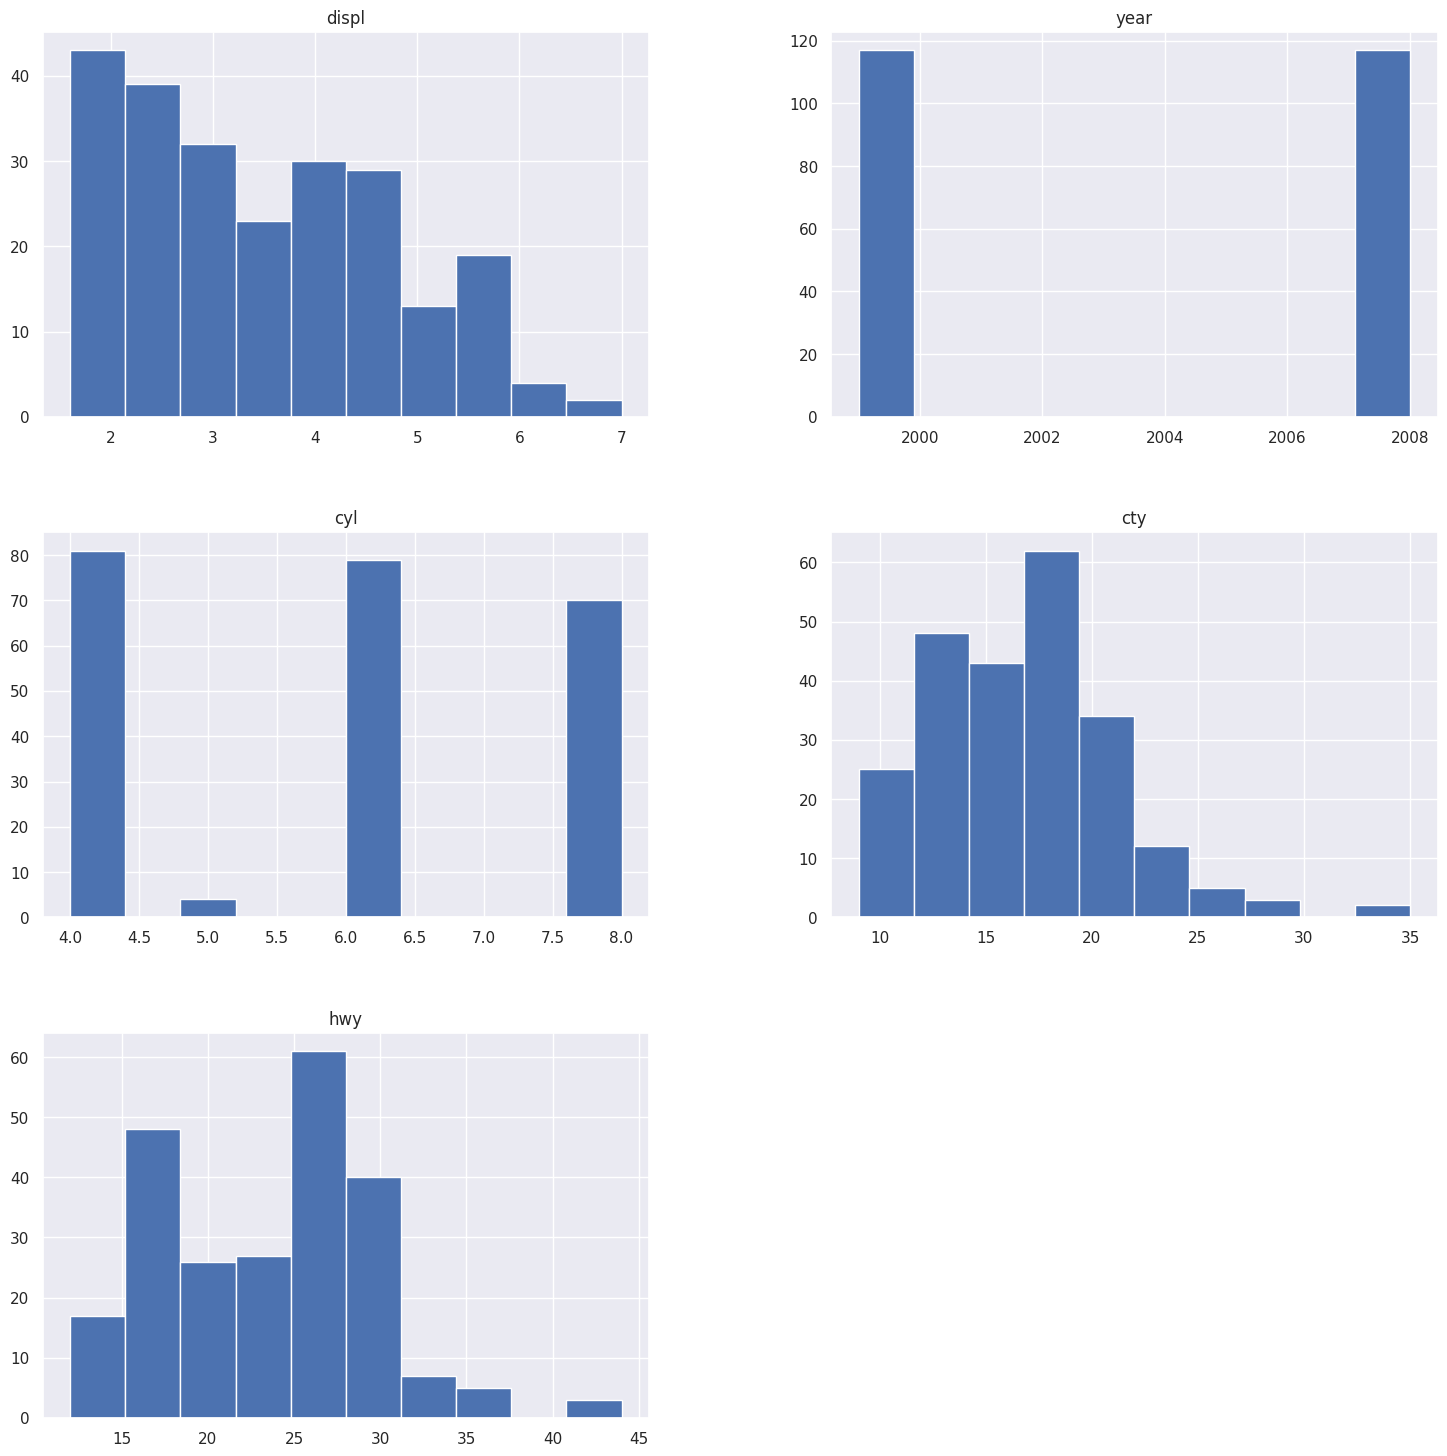

In [ ]:
fig = df.hist(figsize=(18, 18))


/tmp/ipython-input-756041191.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer', y='class', data=df, palette='twilight')


<Axes: xlabel='manufacturer', ylabel='class'>

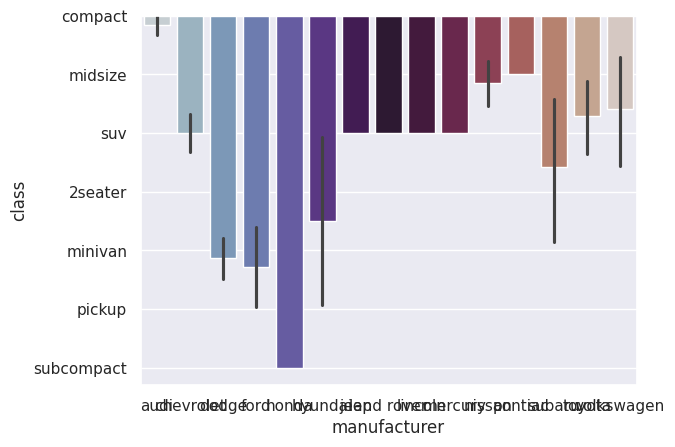

In [ ]:
sns.barplot(x='manufacturer', y='class', data=df, palette='twilight')




/tmp/ipython-input-2894119199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer', y='cty', data=df, palette='twilight')


<Axes: xlabel='manufacturer', ylabel='cty'>

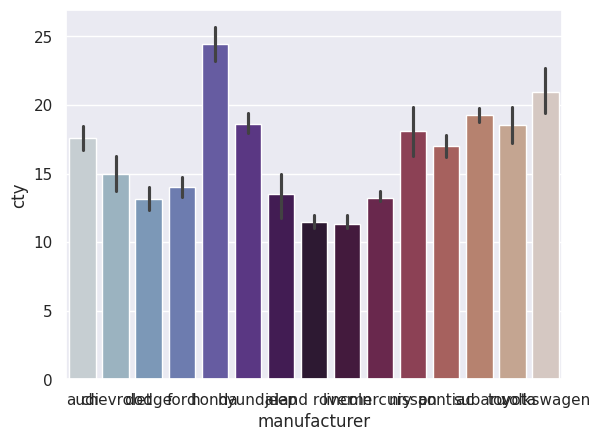

In [ ]:
sns.barplot(x='manufacturer', y='cty', data=df, palette='twilight')



DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

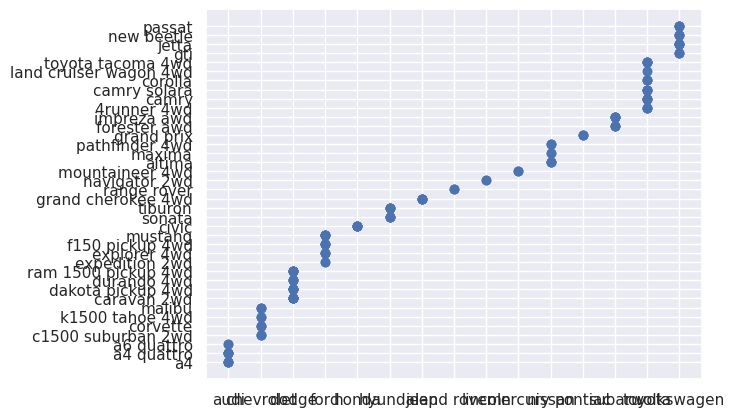

In [18]:
import seaborn as sns

sns.regplot(x='manufacturer', y='model', data=df)



<Axes: xlabel='manufacturer', ylabel='model'>

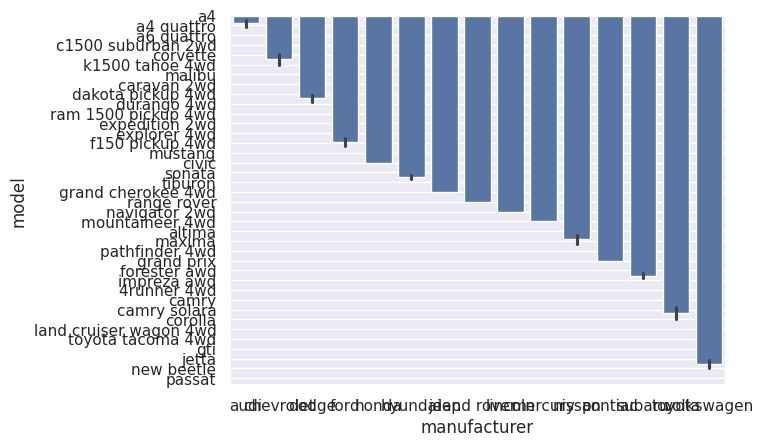

In [ ]:
sns.barplot(x='manufacturer', y='model', data=df)

/tmp/ipython-input-3967187744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturer', y='class', data=df, palette='spring')


<Axes: xlabel='manufacturer', ylabel='class'>

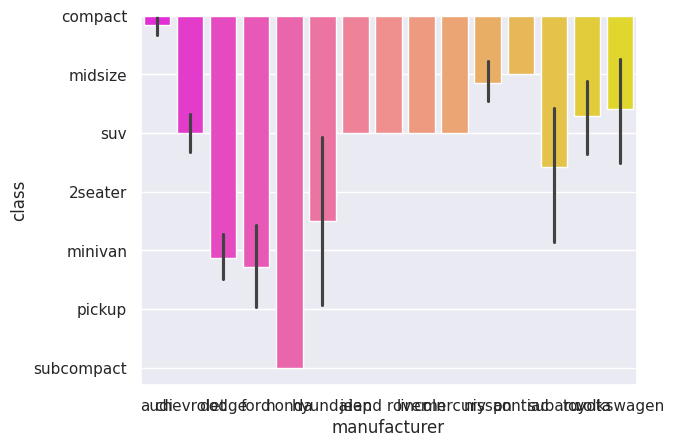

In [11]:
import seaborn as sns

sns.barplot(x='manufacturer', y='class', data=df, palette='spring')



In [19]:
def plot_categorical(feature, dataset):
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of ' + feature)
    plt.xlabel('Count')

    total = len(dataset[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()


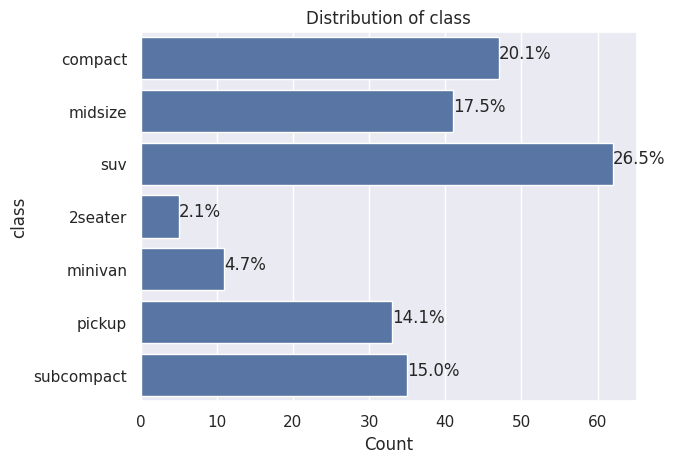

In [20]:
plot_categorical('class' , df)

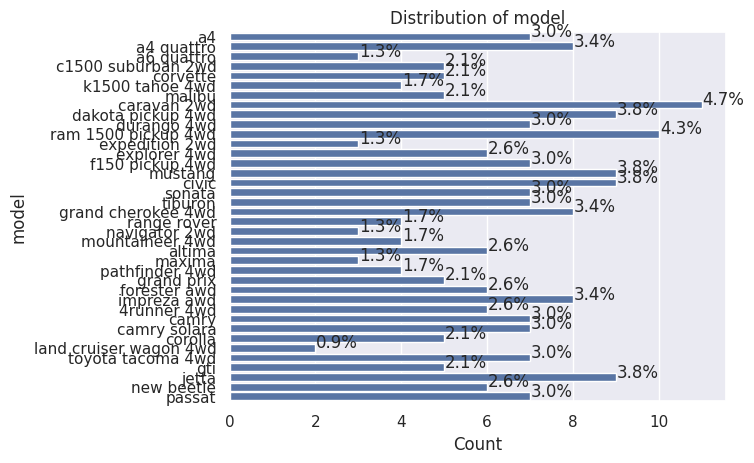

In [21]:
plot_categorical('model' , df)

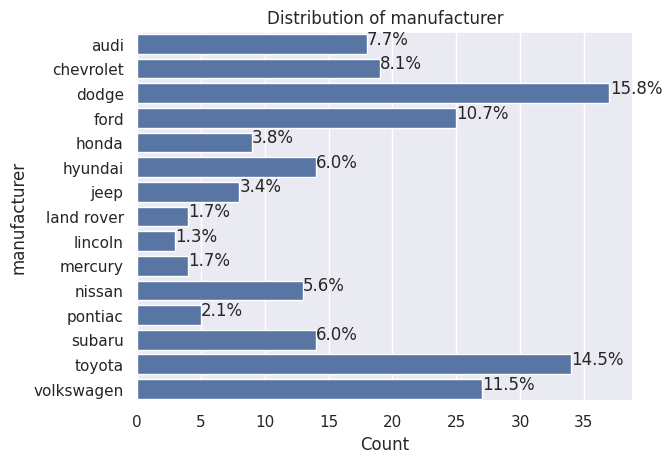

In [22]:
plot_categorical('manufacturer' , df)